**Random Forest - MNIST Dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
print(mnist.data.shape, mnist.target.shape)

(70000, 784) (70000,)


In [ ]:
X = mnist.data.astype('float32').to_numpy() # 0 ~ 255
X /= 255.0 # 0 ~ 1

y = mnist.target.to_numpy()

In [ ]:
show_X = X.reshape(len(X), 28, 28)

print(show_X[10].shape, y[10])

(28, 28) 3


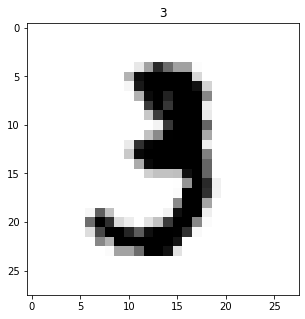

In [ ]:
plt.figure(figsize=(5, 5))
plt.imshow(show_X[10], cmap='Greys')
plt.title(str(y[10]))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

trn_X, tst_X, trn_y, tst_y = train_test_split(X, y, test_size=0.3,
                                              random_state=1234)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

clf_10 = RandomForestClassifier(n_estimators=10).fit(trn_X, trn_y)
prd_10 = clf_10.predict(tst_X)

print(confusion_matrix(y_true=tst_y, y_pred=prd_10))
print(classification_report(y_true=tst_y, y_pred=prd_10))

[[1942    0    6    5    2    9    6    2   15    2]
 [   1 2369   11    3    3    1    2    2    2    3]
 [  12    7 1998   19   10    9   13   22   25    5]
 [  10    8   44 1969    1   41    0   20   30    6]
 [   6    6   10    4 1971    1   13    7    7   43]
 [  22   11    6   44    9 1735   28    2   25    8]
 [  24    5   11    2   14   21 1962    0    7    2]
 [   3   13   27   11   31    2    0 2054    5   29]
 [   7   20   35   47   20   33   12   12 1802   28]
 [  12    5    5   40   63   19    1   33   17 1973]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1989
           1       0.97      0.99      0.98      2397
           2       0.93      0.94      0.94      2120
           3       0.92      0.92      0.92      2129
           4       0.93      0.95      0.94      2068
           5       0.93      0.92      0.92      1890
           6       0.96      0.96      0.96      2048
           7       0.95      0.94   

In [ ]:
clf_30 = RandomForestClassifier(n_estimators=30).fit(trn_X, trn_y)
prd_30 = clf_30.predict(tst_X)

print(confusion_matrix(y_true=tst_y, y_pred=prd_30))
print(classification_report(y_true=tst_y, y_pred=prd_30))

[[1954    1    3    1    1    4   12    1   10    2]
 [   1 2365   11    1    3    2    7    4    1    2]
 [  16    3 2026   14   10    4   11   18   16    2]
 [   3    5   32 2012    0   25    2   18   25    7]
 [   6    4    3    3 1991    0   14    5    3   39]
 [  13    1    5   30    2 1794   20    4   12    9]
 [  17    3    1    1    7   18 1995    0    6    0]
 [   5    9   18    2   18    0    0 2097    3   23]
 [   3   11   23   23   15    8    8    5 1895   25]
 [  12    3    5   32   41    8    2   22   13 2030]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1989
           1       0.98      0.99      0.99      2397
           2       0.95      0.96      0.95      2120
           3       0.95      0.95      0.95      2129
           4       0.95      0.96      0.96      2068
           5       0.96      0.95      0.96      1890
           6       0.96      0.97      0.97      2048
           7       0.96      0.96   

In [ ]:
from sklearn.metrics import accuracy_score

print('Accuracy (# of trees=100) =', accuracy_score(y_true=tst_y, y_pred=prd_10))
print('Accuracy (# of trees=500) =', accuracy_score(y_true=tst_y, y_pred=prd_30))

Accuracy (# of trees=100) = 0.9416666666666667
Accuracy (# of trees=500) = 0.959952380952381


Hyperparameters = n_estimators

In [ ]:
num_trees = [10, 30, 50, 70]

trn_acc = []
tst_acc = []
for T in num_trees:
  print('number of trees =', T)

  clf = RandomForestClassifier(n_estimators=T).fit(trn_X, trn_y)

  fit = clf.predict(trn_X) # 학습 데이터에 대한 예측
  prd = clf.predict(tst_X) # 테스트 데이터에 대한 예측

  trn_accuracy = accuracy_score(y_true=trn_y, y_pred=fit) # 학습 데이터에 대한 정확도
  tst_accuracy = accuracy_score(y_true=tst_y, y_pred=prd) # 테스트 데이터에 대한 정확도

  trn_acc.append(trn_accuracy)
  tst_acc.append(tst_accuracy)

number of trees = 10
number of trees = 30
number of trees = 50
number of trees = 70


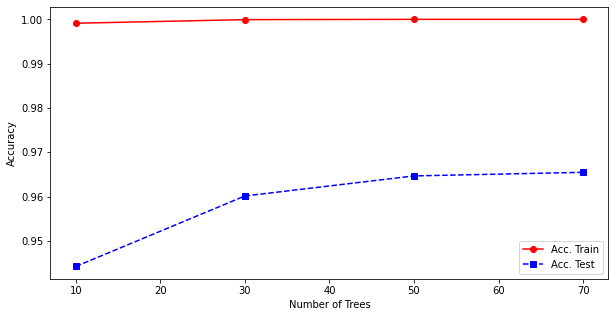

In [ ]:
plt.figure(figsize=(10, 5))

plt.plot(num_trees, trn_acc, 'r-', marker='o', label='Acc. Train')
plt.plot(num_trees, tst_acc, 'b--', marker='s', label='Acc. Test')

plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

Hyperparameters = n_estimators, max_depth

In [ ]:
num_trees = [10, 30, 50, 70]
max_depths = [2, 4, 6, 8]

trn_acc = []
tst_acc = []
hyper_params = []

for T in num_trees:
  for M in max_depths:
    now_params = str(T) + '&' + str(M)
    print('n_estimators & max_depth =', now_params)
    
    hyper_params.append(now_params)

    clf = RandomForestClassifier(n_estimators=T,
                                 max_depth=M).fit(trn_X, trn_y)

    fit = clf.predict(trn_X) # 학습 데이터에 대한 예측
    prd = clf.predict(tst_X) # 테스트 데이터에 대한 예측

    trn_accuracy = accuracy_score(y_true=trn_y, y_pred=fit) # 학습 데이터에 대한 정확도
    tst_accuracy = accuracy_score(y_true=tst_y, y_pred=prd) # 테스트 데이터에 대한 정확도

    trn_acc.append(trn_accuracy)
    tst_acc.append(tst_accuracy)

n_estimators & max_depth = 10&2
n_estimators & max_depth = 10&4
n_estimators & max_depth = 10&6
n_estimators & max_depth = 10&8
n_estimators & max_depth = 30&2
n_estimators & max_depth = 30&4
n_estimators & max_depth = 30&6
n_estimators & max_depth = 30&8
n_estimators & max_depth = 50&2
n_estimators & max_depth = 50&4
n_estimators & max_depth = 50&6
n_estimators & max_depth = 50&8
n_estimators & max_depth = 70&2
n_estimators & max_depth = 70&4
n_estimators & max_depth = 70&6
n_estimators & max_depth = 70&8


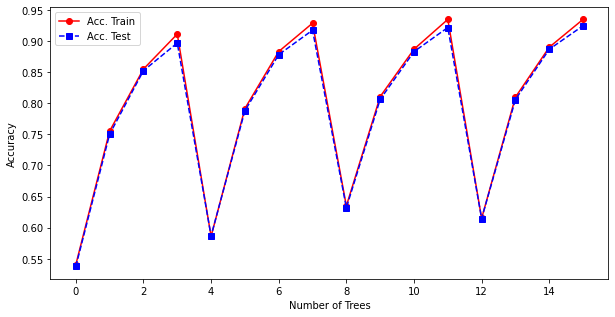

In [ ]:
x = [v for v in range(len(hyper_params))]

plt.figure(figsize=(10, 5))

plt.plot(x, trn_acc, 'r-', marker='o', label='Acc. Train')
plt.plot(x, tst_acc, 'b--', marker='s', label='Acc. Test')

plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

In [ ]:
df = pd.DataFrame({'hyper_params': hyper_params,
                   'Acc_Train': trn_acc,
                   'Acc_Test': tst_acc})
print(df)

   hyper_params  Acc_Train  Acc_Test
0          10&2   0.540224  0.537381
1          10&4   0.755449  0.750429
2          10&6   0.855327  0.852762
3          10&8   0.911653  0.897286
4          30&2   0.585878  0.586476
5          30&4   0.791776  0.788286
6          30&6   0.883571  0.878571
7          30&8   0.929245  0.917952
8          50&2   0.634918  0.632048
9          50&4   0.811000  0.806524
10         50&6   0.887306  0.883381
11         50&8   0.935327  0.922238
12         70&2   0.614898  0.614429
13         70&4   0.810102  0.806286
14         70&6   0.890531  0.887238
15         70&8   0.935388  0.925095


In [ ]:
# Test 데이터에 대한 정확도 기준으로 내림차순 정렬하기
df.sort_values('Acc_Test', ascending=False)

,hyper_params,Acc_Train,Acc_Test
15,70&8,0.935388,0.925095
11,50&8,0.935327,0.922238
7,30&8,0.929245,0.917952
3,10&8,0.911653,0.897286
14,70&6,0.890531,0.887238
10,50&6,0.887306,0.883381
6,30&6,0.883571,0.878571
2,10&6,0.855327,0.852762
9,50&4,0.811000,0.806524
13,70&4,0.810102,0.806286


In [ ]:
for i in range(10):
  for j in range(10):
    print(i)
    print(j)